Creating a Linear regression to predict G3 - final grade of an student

In [1]:
## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

DATA INFORMATION

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

LOADING THE RAW DATA

In [3]:
raw_data = pd.read_csv('student-mat.csv', delimiter = ";")
raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
raw_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [6]:
raw_data.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

In [7]:
raw_data.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

In [8]:
pd.options.display.max_columns = raw_data.shape[1]

In [9]:
raw_data.describe(include = 'all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,395,395,395.000000,395.000000,395.000000,395,395,395,395,395,395,395,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,145,273,NaN,NaN,NaN,344,242,214,201,314,375,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,NaN,NaN,1.448101,2.035443,0.334177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,NaN,NaN,0.697505,0.839240,0.743651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


IN absences THE MAXIMUN VALUE IS MUCH HIGHER THAN THE 75%. THAT MEANS OUTLIERS.
in the graphic below we can see that the outliers make the graphic to be exponencial no linear
USUALLY DELETING 2% OF THE TOP WE DROP THE OUTLIERS

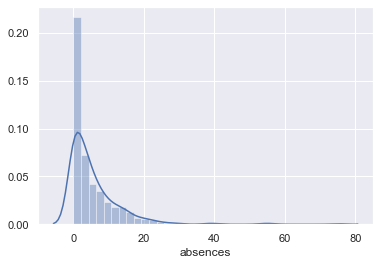

In [10]:
sns.distplot(raw_data['absences'])

In [11]:
q = raw_data['absences'].quantile(0.98)

In [12]:
q

25.120000000000005

In [13]:
raw_data1 = raw_data[raw_data['absences']<q]
#data_3.describe()

In [14]:
pd.options.display.max_columns = raw_data1.shape[1]

In [15]:
raw_data1.describe (include = 'all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,387,387,387.000000,387,387,387,387.000000,387.000000,387,387,387,387,387.000000,387.000000,387.000000,387,387,387,387,387,387,387,387,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,341,202,NaN,301,275,348,NaN,NaN,137,213,145,267,NaN,NaN,NaN,338,237,211,198,307,368,321,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.684755,NaN,NaN,NaN,2.741602,2.516796,NaN,NaN,NaN,NaN,1.447028,2.036176,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.940568,3.242894,3.108527,1.478036,2.289406,3.550388,4.930233,10.937984,10.746770,10.449612
std,NaN,NaN,1.273016,NaN,NaN,NaN,1.101295,1.090041,NaN,NaN,NaN,NaN,0.700969,0.841744,0.748054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904269,0.991111,1.112158,0.894084,1.285215,1.388113,5.486941,3.337071,3.785431,4.616867
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


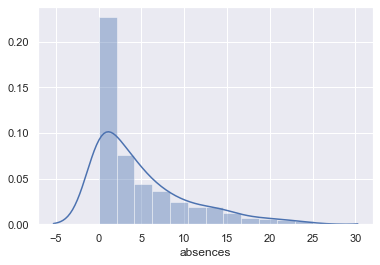

In [16]:
sns.distplot(raw_data1['absences'])

In [17]:
raw_data1.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [18]:
raw_data1.shape

(387, 33)

we need to clean the index because it include also the useless data

In [19]:
raw_data1 = raw_data1.reset_index(drop = True)
raw_data1.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
382,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
383,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
384,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
385,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
386,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [20]:
data_no_multicollinearity  = raw_data1.copy()

In [21]:
data_no_multicollinearity.school = data_no_multicollinearity.school.map({'GP':0, 'MS':1})

In [22]:
data_no_multicollinearity

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,0,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,0,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
383,1,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
384,1,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
385,1,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [23]:
data_no_multicollinearity.sex = data_no_multicollinearity.sex.replace(to_replace=['F', 'M'], value=[0, 1])

In [24]:
data_no_multicollinearity

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,0,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,0,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,0,0,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,0,0,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,1,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
383,1,1,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
384,1,1,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
385,1,1,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [25]:
data_no_multicollinearity.address = data_no_multicollinearity.address.replace(to_replace=['U', 'R'], value=[0, 1])

In [26]:
data_no_multicollinearity.famsize = data_no_multicollinearity.famsize.replace(to_replace=['LE3', 'GT3'], value=[0, 1])

In [27]:
data_no_multicollinearity

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,1,20,0,0,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
383,1,1,17,0,0,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
384,1,1,21,1,1,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
385,1,1,18,1,0,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [28]:
data_no_multicollinearity.Pstatus = data_no_multicollinearity.Pstatus.replace(to_replace=['T', 'A'], value=[0, 1])

In [29]:
data_no_multicollinearity.Mjob = data_no_multicollinearity.Mjob.replace(to_replace=['teacher', 'health', 'services','at_home' , 'other'], value=[0, 1, 2, 3, 4])

In [30]:
data_no_multicollinearity.Fjob = data_no_multicollinearity.Fjob.replace(to_replace=['teacher', 'health', 'services', 'at_home', 'other'], value=[0, 1, 2, 3, 4])

In [31]:
data_no_multicollinearity.reason = data_no_multicollinearity.reason.replace(to_replace=['home', 'reputation', 'course', 'other'], value=[0, 1, 2, 3])

In [32]:
data_no_multicollinearity.guardian = data_no_multicollinearity.guardian.replace(to_replace=['mother', 'father','other'], value=[0, 1, 2])

In [33]:
data_no_multicollinearity.schoolsup = data_no_multicollinearity.schoolsup.replace(to_replace=['yes', 'no'], value=[0, 1])

In [34]:
data_no_multicollinearity.famsup = data_no_multicollinearity.famsup.replace(to_replace=['yes', 'no'], value=[0, 1])

In [35]:
data_no_multicollinearity.paid = data_no_multicollinearity.paid.replace(to_replace=['yes', 'no'], value=[0, 1])

In [36]:
data_no_multicollinearity.activities = data_no_multicollinearity.activities.replace(to_replace=['yes', 'no'], value=[0, 1])

In [37]:
data_no_multicollinearity.nursery = data_no_multicollinearity.nursery.replace(to_replace=['yes', 'no'], value=[0, 1])

In [38]:
data_no_multicollinearity

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,2,0,2,2,0,0,1,1,1,0,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,0,1,1,3,4,2,1,1,2,0,1,0,1,1,1,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,0,1,1,3,4,3,0,1,2,3,0,1,0,1,0,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,0,4,2,1,2,0,0,1,3,0,1,0,0,0,0,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,0,3,3,4,4,0,1,1,2,0,1,0,0,1,0,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,1,20,0,0,1,2,2,2,2,2,2,1,2,2,1,0,0,1,0,yes,no,no,5,5,4,4,5,4,11,9,9,9
383,1,1,17,0,0,0,3,1,2,2,2,0,2,1,0,1,1,1,1,1,yes,yes,no,2,4,5,3,4,2,3,14,16,16
384,1,1,21,1,1,0,1,1,4,4,2,2,1,1,3,1,1,1,1,1,yes,no,no,5,5,3,3,3,3,3,10,8,7
385,1,1,18,1,0,0,3,2,2,4,2,0,3,1,0,1,1,1,1,1,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [39]:
data_no_multicollinearity.higher = data_no_multicollinearity.higher.replace(to_replace=['yes', 'no'], value=[0, 1])

In [40]:
data_no_multicollinearity.internet = data_no_multicollinearity.internet.replace(to_replace=['yes', 'no'], value=[0, 1])

In [41]:
data_no_multicollinearity.romantic = data_no_multicollinearity.romantic.replace(to_replace=['yes', 'no'], value=[0, 1])

In [42]:
data_no_multicollinearity.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [43]:
data_no_multicollinearity.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [44]:
data_no_multicollinearity

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,2,0,2,2,0,0,1,1,1,0,0,1,1,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,0,1,1,3,4,2,1,1,2,0,1,0,1,1,1,0,0,1,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,0,1,1,3,4,3,0,1,2,3,0,1,0,1,0,0,0,1,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,0,4,2,1,2,0,0,1,3,0,1,0,0,0,0,0,0,0,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,0,3,3,4,4,0,1,1,2,0,1,0,0,1,0,0,1,1,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,1,20,0,0,1,2,2,2,2,2,2,1,2,2,1,0,0,1,0,0,1,1,5,5,4,4,5,4,11,9,9,9
383,1,1,17,0,0,0,3,1,2,2,2,0,2,1,0,1,1,1,1,1,0,0,1,2,4,5,3,4,2,3,14,16,16
384,1,1,21,1,1,0,1,1,4,4,2,2,1,1,3,1,1,1,1,1,0,1,1,5,5,3,3,3,3,3,10,8,7
385,1,1,18,1,0,0,3,2,2,4,2,0,3,1,0,1,1,1,1,1,0,0,1,4,4,1,3,4,5,0,11,12,10


ASSUMPTIONS FOR LINEAR REGRESSION

CHECKING OLS ASSUMPTIONS
NOTE: THE DUMMY VARIABLES DO NOT NEED TO COMPLY THE ASSUMPTIONS

NO ENDOGENEITY (correlation between error and independent variable), we will check the residuals
after the regression is created

NORMALITY AND HOMOSCEDASTICITY
Normality = is met when we have big sample, as this is the case. Following the CLT (Center Limit Theoreman)

Zero Mean = met the assumption when we include the intercept in the regression

 

NORMALITY AND HOMOSCEDASTICITY
Normality = is met when we have big sample, as this is the case. Following the CLT (Center Limit Theoreman)

Zero Mean = met the assumption when we include the intercept in the regression

Homoscedasticity = met the assumption according with the graph, the transformation resolved it. transformation generally fix the hetereoscedasticity
 

In [45]:
data_no_multicollinearity.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
variables = data_no_multicollinearity[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i)for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif 

,VIF,features
0,1.531661,school
1,2.747437,sex
2,94.062767,age
3,1.740825,address
4,3.883092,famsize
5,1.242817,Pstatus
6,17.217434,Medu
7,12.913976,Fedu
8,6.863257,Mjob
9,8.525230,Fjob


VIF = 1/(1 - R2), when R2 = 0 means no multicollinearity, then VIF = 1
when vif is = 1 means no multicollinearity, 

when 1 < vif < 5 means perfectly ok.
usually it is rarely find data so perfect that all features have VIF < 5.
In this case age, G1 and G2 too high, therefore we remove them

In [47]:
data_no_multicollinearity = data_no_multicollinearity.drop(['age', 'G1', 'G2', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout'], axis = 1)
data_no_multicollinearity

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Dalc,Walc,health,absences,G3
0,0,0,0,1,1,3,0,2,0,2,2,0,0,1,1,1,0,0,1,1,1,1,3,6,6
1,0,0,0,1,0,3,4,2,1,1,2,0,1,0,1,1,1,0,0,1,1,1,3,4,6
2,0,0,0,0,0,3,4,3,0,1,2,3,0,1,0,1,0,0,0,1,2,3,3,10,10
3,0,0,0,1,0,1,2,0,0,1,3,0,1,0,0,0,0,0,0,0,1,1,5,2,15
4,0,0,0,1,0,4,4,0,1,1,2,0,1,0,0,1,0,0,1,1,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,1,0,0,1,2,2,2,2,1,2,2,1,0,0,1,0,0,1,1,4,5,4,11,9
383,1,1,0,0,0,2,2,2,0,2,1,0,1,1,1,1,1,0,0,1,3,4,2,3,16
384,1,1,1,1,0,4,4,2,2,1,1,3,1,1,1,1,1,0,1,1,3,3,3,3,7
385,1,1,1,0,0,2,4,2,0,3,1,0,1,1,1,1,1,0,0,1,3,4,5,0,10


In [48]:

variables = data_no_multicollinearity[['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'Dalc',
       'Walc', 'health', 'absences']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i)for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif 

,VIF,features
0,1.445753,school
1,2.555415,sex
2,1.665771,address
3,3.536233,famsize
4,1.196314,Pstatus
5,5.321592,Mjob
6,7.064078,Fjob
7,2.989560,reason
8,1.610326,guardian
9,5.977523,traveltime


In [49]:
data_no_multicollinearity.G3.unique

<bound method Series.unique of 0       6
1       6
2      10
3      15
4      10
       ..
382     9
383    16
384     7
385    10
386     9
Name: G3, Length: 387, dtype: int64>

data_no_multicollinearity.G3 = data_no_multicollinearity.astype({'G3': 'int32'}).dtypes

In [50]:
data_no_multicollinearity.G3.describe()

count    387.000000
mean      10.449612
std        4.616867
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [51]:
data_no_multicollinearity.G3.unique

<bound method Series.unique of 0       6
1       6
2      10
3      15
4      10
       ..
382     9
383    16
384     7
385    10
386     9
Name: G3, Length: 387, dtype: int64>

#df_ages['G3_bins'] = pd.cut(x=data_no_multicollinearity['G3'],right == True, bins=[2, 4, 6, 8, 10, 12, 12, 16, 18, 20])
data_no_multicollinearity['G3_bins'] = pd.cut((data_no_multicollinearity['G3']),10)


data_no_multicollinearity['G3_bins'].dtype

In [52]:
data_no_multicollinearity

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Dalc,Walc,health,absences,G3
0,0,0,0,1,1,3,0,2,0,2,2,0,0,1,1,1,0,0,1,1,1,1,3,6,6
1,0,0,0,1,0,3,4,2,1,1,2,0,1,0,1,1,1,0,0,1,1,1,3,4,6
2,0,0,0,0,0,3,4,3,0,1,2,3,0,1,0,1,0,0,0,1,2,3,3,10,10
3,0,0,0,1,0,1,2,0,0,1,3,0,1,0,0,0,0,0,0,0,1,1,5,2,15
4,0,0,0,1,0,4,4,0,1,1,2,0,1,0,0,1,0,0,1,1,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,1,0,0,1,2,2,2,2,1,2,2,1,0,0,1,0,0,1,1,4,5,4,11,9
383,1,1,0,0,0,2,2,2,0,2,1,0,1,1,1,1,1,0,0,1,3,4,2,3,16
384,1,1,1,1,0,4,4,2,2,1,1,3,1,1,1,1,1,0,1,1,3,3,3,3,7
385,1,1,1,0,0,2,4,2,0,3,1,0,1,1,1,1,1,0,0,1,3,4,5,0,10


In [53]:
data_clean = data_no_multicollinearity.copy()

In [54]:
data_clean

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Dalc,Walc,health,absences,G3
0,0,0,0,1,1,3,0,2,0,2,2,0,0,1,1,1,0,0,1,1,1,1,3,6,6
1,0,0,0,1,0,3,4,2,1,1,2,0,1,0,1,1,1,0,0,1,1,1,3,4,6
2,0,0,0,0,0,3,4,3,0,1,2,3,0,1,0,1,0,0,0,1,2,3,3,10,10
3,0,0,0,1,0,1,2,0,0,1,3,0,1,0,0,0,0,0,0,0,1,1,5,2,15
4,0,0,0,1,0,4,4,0,1,1,2,0,1,0,0,1,0,0,1,1,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1,1,0,0,1,2,2,2,2,1,2,2,1,0,0,1,0,0,1,1,4,5,4,11,9
383,1,1,0,0,0,2,2,2,0,2,1,0,1,1,1,1,1,0,0,1,3,4,2,3,16
384,1,1,1,1,0,4,4,2,2,1,1,3,1,1,1,1,1,0,1,1,3,3,3,3,7
385,1,1,1,0,0,2,4,2,0,3,1,0,1,1,1,1,1,0,0,1,3,4,5,0,10


In [55]:
inputs = data_clean.drop(['G3'], axis = 1)

In [56]:
inputs.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Dalc,Walc,health,absences
0,0,0,0,1,1,3,0,2,0,2,2,0,0,1,1,1,0,0,1,1,1,1,3,6
1,0,0,0,1,0,3,4,2,1,1,2,0,1,0,1,1,1,0,0,1,1,1,3,4
2,0,0,0,0,0,3,4,3,0,1,2,3,0,1,0,1,0,0,0,1,2,3,3,10
3,0,0,0,1,0,1,2,0,0,1,3,0,1,0,0,0,0,0,0,0,1,1,5,2
4,0,0,0,1,0,4,4,0,1,1,2,0,1,0,0,1,0,0,1,1,1,2,5,4


In [57]:
target = data_clean.G3

In [58]:
target.head

<bound method NDFrame.head of 0       6
1       6
2      10
3      15
4      10
       ..
382     9
383    16
384     7
385    10
386     9
Name: G3, Length: 387, dtype: int64>

### Split the dataset into train, validation, and test

In [59]:
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs,target, test_size=0.2, random_state=42)

### Save the three datasets in *.npz

In [60]:
# Save the 2 datasets in *.npz.
# In the next lesson, you will see that it is extremely valuable to name them in such a coherent way!

np.savez('student performance_train', inputs = train_inputs, target = train_targets)
np.savez('student performance_test', inputs = test_inputs, target = test_targets)

student performance random forest-part 2